In [2]:
#Zadanie 1
import numpy as np
import matplotlib.pyplot as plt

def our_derivative(x, func, step = 1, mode = "central"):
    df = np.zeros(len(x))
    if mode == "central":
        for i in range(1, len(x)-1):
            df[i] = (func(x[i]+step)-func(x[i]-step))/(2*step)
    if mode == "forward":
        for i in range(0, len(x)-1):
            df[i] = (func(x[i]+step)-func(x[i]))/(step)
    if mode == "backward":
        for i in range(1, len(x)):
            df[i] = (func(x[i])-func(x[i]-step))/(step)
    return df
start = 0
stop = 5
step = 0.01
samples = int((stop-start)/step)
x = np.linspace(start, stop, samples)
func = lambda x: 2*x
plt.plot(x, np.sin(x), "r-")
plt.plot(x, our_derivative(x, np.sin, step, mode = "backward"), "g-")


In [3]:
#Zadanie 2
import time
import scipy.signal as sc
def our_conv(x1, x2):
    #jak mode=full
    x1_flip = np.flip(x1)
    result = np.zeros(len(x1)+len(x2)-1)
    x2_padded = np.zeros(len(x1)-1)
    x2_padded = np.append(x2_padded, x2)
    x2_padded = np.append(x2_padded, np.zeros(len(x1)-1))
    for i in range(len(result)):
        result[i] = (x1_flip*x2_padded[i:i+len(x1_flip)]).sum()
    return result
print("moje:", our_conv(np.array([3, 4]), np.array([2])))
print("np.convolve:", np.convolve([3, 4], [2], mode="full"))
array1 = np.random.normal(2, 3, 3000)
array2 = np.random.normal(2, 3, 50000)
time1 = time.time()
our_conv(array1, array2)
time2 = time.time()
print("Moje:", (time2-time1))

time1 = time.time()
np.convolve(array1, array2)
time2 = time.time()
print("np.convolve:", (time2-time1))

time1 = time.time()
sc.fftconvolve(array1, array2)
time2 = time.time()
print("fftconvolve:", (time2-time1))

moje: [6. 8.]
np.convolve: [6 8]
Moje: 0.7675426006317139
np.convolve: 0.05097317695617676
fftconvolve: 0.025815248489379883


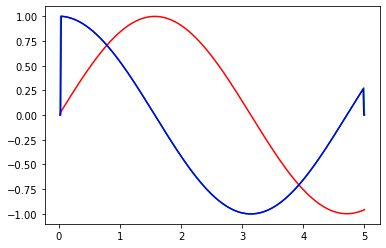

In [41]:
#zadanie 3
def conv_derivative(y, step = 1, order=1):
    if order == 1:
        conv_filter = np.array([-1, 0, 1])
        dy = np.zeros(len(y))
        for i in range(1, len(y)-1):
            dy[i] = (conv_filter*y[i-1:i+2]).sum()
        return dy/(2*step)
    if order == 2:
        conv_filter = np.array([1, -2, 1])
        dy = np.zeros(len(y))
        for i in range(1, len(y)-1):
            dy[i] = (conv_filter*y[i-1:i+2]).sum()
        return dy/(step*step)
    if order == 3:
        conv_filter = np.array([-1, 2, 0, -2, 1])
        dy = np.zeros(len(y))
        for i in range(2, len(y)-2):
            dy[i] = (conv_filter*y[i-2:i+3]).sum()
        return dy/(2*step*step*step)
    if order == 4:
        conv_filter = np.array([1, -4, 6, -4, 1])
        dy = np.zeros(len(y))
        for i in range(2, len(y)-2):
            dy[i] = (conv_filter*y[i-2:i+3]).sum()
        return dy/(step**4)
    
def seq_derivative1(x, func, step, order):
    df = np.zeros(len(x))
    if order == 1:    
        for i in range(len(x)):
            df[i] = (func(x[i]+step)-func(x[i]-step))/(2*step)
        return df
    if order == 2:
        for i in range(len(x)):
            df[i] = (func(x[i]+step)+func(x[i]-step)-2*func(x[i]))/(step*step)
        return df
    if order == 3:
        for i in range(len(x)):
            df[i] = (2*func(x[i]-step)-2*func(x[i]+step)-func(x[i]-2*step) + func(x[i]+2*step))/(2*step*step*step)
        return df
    if order == 4:
        for i in range(len(x)):
            df[i] = (func(x[i]+2*step)+func(x[i]-2*step)+6*func(x[i])-4*func(x[i]-step)-4*func(x[i]+step))/(step**4)
        return df
    
def seq_derivative(y, step = 1, order = 1):
    dy = np.zeros(len(y))
    for i in range(order+1, len(y)-order-1):
        dy[i] = (y[i+1]-y[i-1])/(2*step)
    return dy
        
    
    
def final_derivative(x, func, step=1, order=1, mode = "conv"):
    #mode: conv, seq | order: 1-4 |
    if mode == "conv":
        return conv_derivative(func(x), step, order)
    if mode == "seq":
        result = np.copy(func(x))
        for i in range(order):
            result = seq_derivative(result, step, i+1)
        return result
    
    
start = 0.02
stop = 5
step = 0.01
samples = int((stop-start)/step)

x = np.linspace(start, stop, samples)
func1 = lambda x: np.sin(x)
plt.plot(x, func1(x), "r-")
plt.plot(x, final_derivative(x, func1, step = step, order=1 ,mode = "conv"), "g-")
plt.plot(x, final_derivative(x, func1, step = step, order=1 ,mode = "seq"), "b-")

[[ 1  0 -1]]
[[ 1]
 [ 0]
 [-1]]


(-0.5, 6282.5, 6280.5, -0.5)

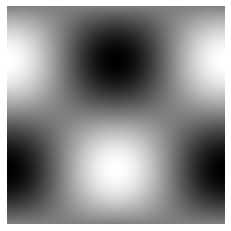

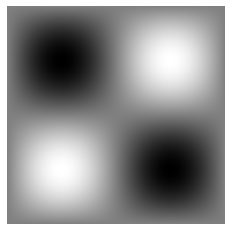

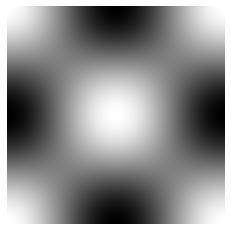

In [49]:
#Zadanie 5
def our_grad(y, step):
    results = []
    conv_filter = np.array([1, 0, -1])
    for j in range(0, y.ndim-1):    
        conv_filter = np.expand_dims(conv_filter, j)
    for j in range(y.ndim):
        #print(np.rollaxis(conv_filter, y.ndim-1, y.ndim-1-j))
        dy = sc.fftconvolve(np.rollaxis(conv_filter, y.ndim-1, y.ndim-1-j), y, mode="valid") 
        results.append(dy/(2*step))
    return results


step = 0.001
start = -np.pi
stop = np.pi
samples = int((stop - start) / step)
x = np.linspace(start, stop, samples)
y = np.linspace(start, stop, samples)

xs, ys = np.meshgrid(x, y)
zs = np.cos(xs)*np.sin(ys)
grad = our_grad(zs, step)


plt.figure()
plt.imshow(zs, cmap='gray')
plt.axis('off')

plt.figure()
plt.imshow(grad[0], cmap='gray')
plt.axis('off')

plt.figure()
plt.imshow(grad[1], cmap='gray')
plt.axis('off')